In [2]:
!pip install pyarrow fastparquet lxml xgboost

In [3]:
from google.colab import files
uploaded = files.upload()

Saving loan_details.xlsx to loan_details (1).xlsx
Saving geographic_data.xml to geographic_data (1).xml
Saving financial_ratios.jsonl to financial_ratios (1).jsonl
Saving demographics.csv to demographics (1).csv
Saving application_metadata.csv to application_metadata (1).csv
Saving credit_history.parquet to credit_history (1).parquet


In [4]:
import pandas as pd
df_jsonl = pd.read_json("financial_ratios.jsonl", lines=True)
df_parquet = pd.read_parquet("credit_history.parquet")
df_xml = pd.read_xml("geographic_data.xml")
df_excel = pd.read_excel("loan_details.xlsx")
df_csv1 = pd.read_csv("application_metadata.csv")
df_csv2 = pd.read_csv("demographics.csv")

In [5]:
df_loan = df_excel
df_meta = df_csv1
df_demo = df_csv2
print("Aliases created: df_loan, df_meta, df_demo")

Aliases created: df_loan, df_meta, df_demo


In [6]:
df_loan = df_loan.rename(columns={'customer_id': 'application_id'})
df_loan['loan_amount'] = df_loan['loan_amount'].astype(str).str.replace(r'[$,]', '', regex=True).astype(float)
print("df_loan: 'customer_id' renamed to 'application_id' and 'loan_amount' cleaned and converted to numeric.")

df_loan: 'customer_id' renamed to 'application_id' and 'loan_amount' cleaned and converted to numeric.


In [7]:
for col in ['loan_amount', 'loan_term', 'interest_rate']:
    if pd.api.types.is_numeric_dtype(df_loan[col]):
        median_val = df_loan[col].median()
        df_loan[col].fillna(median_val, inplace=True)
print("df_loan: Missing numeric values in 'loan_amount', 'loan_term', and 'interest_rate' filled with medians.")

df_loan: Missing numeric values in 'loan_amount', 'loan_term', and 'interest_rate' filled with medians.


/tmp/ipython-input-501908097.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_loan[col].fillna(median_val, inplace=True)


In [8]:
for col in ['loan_amount', 'loan_term', 'interest_rate']:
    if pd.api.types.is_numeric_dtype(df_loan[col]):
        median_val = df_loan[col].median()
        df_loan[col] = df_loan[col].fillna(median_val)
print("df_loan: Missing numeric values in 'loan_amount', 'loan_term', and 'interest_rate' filled with medians.")

df_loan: Missing numeric values in 'loan_amount', 'loan_term', and 'interest_rate' filled with medians.


In [9]:
df_loan['loan_type'].fillna('missing', inplace=True)
df_loan = pd.get_dummies(df_loan, columns=['loan_type'], prefix='loan_type', drop_first=True)
print("df_loan: Missing values in 'loan_type' filled and one-hot encoded.")

df_loan: Missing values in 'loan_type' filled and one-hot encoded.


/tmp/ipython-input-2027363119.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_loan['loan_type'].fillna('missing', inplace=True)


In [10]:
df_loan = df_excel.copy()
df_loan = df_loan.rename(columns={'customer_id': 'application_id'})
df_loan['loan_amount'] = df_loan['loan_amount'].astype(str).str.replace(r'[$,]', '', regex=True).astype(float)
for col in ['loan_amount', 'loan_term', 'interest_rate']:
    if pd.api.types.is_numeric_dtype(df_loan[col]):
        median_val = df_loan[col].median()
        df_loan[col] = df_loan[col].fillna(median_val)
df_loan['loan_type'] = df_loan['loan_type'].fillna('missing')
df_loan = pd.get_dummies(df_loan, columns=['loan_type'], prefix='loan_type', drop_first=True)
print("df_loan: 'loan_type' filled and one-hot encoded after re-initialization and previous cleaning steps.")

df_loan: 'loan_type' filled and one-hot encoded after re-initialization and previous cleaning steps.


In [11]:
df_demo = df_demo.rename(columns={'cust_id': 'application_id'})
print("df_demo: 'cust_id' renamed to 'application_id'.")

df_demo: 'cust_id' renamed to 'application_id'.


In [12]:
df_demo['annual_income'] = df_demo['annual_income'].astype(str).str.replace(r'[$,]', '', regex=True).astype(float)
print("df_demo: 'annual_income' cleaned and converted to numeric.")

df_demo: 'annual_income' cleaned and converted to numeric.


In [13]:
for col in ['age', 'annual_income', 'employment_length']:
    if pd.api.types.is_numeric_dtype(df_demo[col]):
        median_val = df_demo[col].median()
        df_demo[col] = df_demo[col].fillna(median_val)
print("df_demo: Missing numeric values in 'age', 'annual_income', and 'employment_length' filled with medians.")

df_demo: Missing numeric values in 'age', 'annual_income', and 'employment_length' filled with medians.


In [14]:
df_demo['employment_type'] = df_demo['employment_type'].fillna('missing')
df_demo = pd.get_dummies(df_demo, columns=['employment_type'], prefix='employment_type', drop_first=True)
print("df_demo: Missing values in 'employment_type' filled and one-hot encoded.")

df_demo: Missing values in 'employment_type' filled and one-hot encoded.


In [15]:
df_demo = df_csv2.copy()
df_demo = df_demo.rename(columns={'cust_id': 'application_id'})
df_demo['annual_income'] = df_demo['annual_income'].astype(str).str.replace(r'[$,]', '', regex=True).astype(float)
for col in ['age', 'annual_income', 'employment_length']:
    if pd.api.types.is_numeric_dtype(df_demo[col]):
        median_val = df_demo[col].median()
        df_demo[col] = df_demo[col].fillna(median_val)
df_demo['employment_type'] = df_demo['employment_type'].fillna('missing')
df_demo = pd.get_dummies(df_demo, columns=['employment_type'], prefix='employment_type', drop_first=True)
if 'gender' in df_demo.columns:
    df_demo['gender'] = df_demo['gender'].fillna('missing')
    df_demo = pd.get_dummies(df_demo, columns=['gender'], prefix='gender', drop_first=True)
    print("df_demo: 'gender' filled and one-hot encoded after re-initialization and previous cleaning steps.")
else:
    print("Warning: 'gender' column not found in df_demo. Skipping fill and one-hot encoding for 'gender'.")

In [16]:
if pd.api.types.is_numeric_dtype(df_meta['application_hour']):
    median_val = df_meta['application_hour'].median()
    df_meta['application_hour'] = df_meta['application_hour'].fillna(median_val)
print("df_meta: Missing numeric values in 'application_hour' filled with median.")

df_meta: Missing numeric values in 'application_hour' filled with median.


In [17]:
import xml.etree.ElementTree as ET
import pandas as pd
xml_path = "geographic_data.xml"
candidate_record_tags = {"record", "row", "entry", "item"}
records = []
current_tag = None
for event, elem in ET.iterparse(xml_path, events=("end",)):
    if elem.tag in candidate_record_tags:
        current_tag = elem.tag
        break
if current_tag is None:
    tag_counts = {}
    for event, elem in ET.iterparse(xml_path, events=("end",)):
        tag_counts[elem.tag] = tag_counts.get(elem.tag, 0) + len(list(elem))
    current_tag = max(tag_counts, key=lambda k: tag_counts[k]) if tag_counts else None
records = []
for event, elem in ET.iterparse(xml_path, events=("end",)):
    if elem.tag == current_tag:
        row = {}
        def flatten(e, prefix=None):
            for child in e:
                name = f"{prefix}_{child.tag}" if prefix else child.tag
                if list(child):
                    flatten(child, prefix=name)
                else:
                    row[name] = child.text
        flatten(elem)
        records.append(row)
        elem.clear()
df = pd.DataFrame(records)
df = df.rename(columns={'id': 'application_id'})
print("Satrlari:", len(df))
df.head()

Satrlari: 89999


,application_id,state,regional_unemployment_rate,regional_median_income,regional_median_rent,housing_price_index,cost_of_living_index,previous_zip_code
0,10000,OH,4.8,56000,1380.0,91.0,73.0,451
1,10001,PA,4.4,61000,1510.0,92.0,87.0,537
2,10002,VA,3.9,74000,1920.0,125.0,103.0,679
3,10003,CA,5.8,75000,1690.0,158.0,121.0,719
4,10004,WA,5.8,78000,1700.0,152.0,127.0,933


In [18]:
import numpy as np
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="ignore")
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = pd.to_numeric(df[col], errors="coerce")
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
    else:
        df[col] = df[col].astype(str).replace({"None": np.nan})
        df[col].fillna("missing", inplace=True)
df.head()

/tmp/ipython-input-763177208.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-763177208.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
/tmp/ipython-input-763177208.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace meth

,application_id,state,regional_unemployment_rate,regional_median_income,regional_median_rent,housing_price_index,cost_of_living_index,previous_zip_code
0,10000,OH,4.8,56000,1380.0,91.0,73.0,451
1,10001,PA,4.4,61000,1510.0,92.0,87.0,537
2,10002,VA,3.9,74000,1920.0,125.0,103.0,679
3,10003,CA,5.8,75000,1690.0,158.0,121.0,719
4,10004,WA,5.8,78000,1700.0,152.0,127.0,933


In [19]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = [c for c in ["region", "city", "country"] if c in df.columns]
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])
other_cat = [c for c in df.columns if (not pd.api.types.is_numeric_dtype(df[c])) and (c not in categorical_cols)]
for col in other_cat:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [20]:
if {"population", "area"}.issubset(df.columns):
    df["area"] = df["area"].replace(0, np.nan)
    df["population_density"] = df["population"] / df["area"]
    df["population_density"].fillna(df["population_density"].median(), inplace=True)
if "region" in df.columns:
    region_counts = df["region"].value_counts()
    df["region_risk"] = df["region"].map(region_counts).fillna(0)
if "city" in df.columns:
    city_counts = df["city"].value_counts()
    df["city_risk"] = df["city"].map(city_counts).fillna(0)
if "country" in df.columns:
    country_counts = df["country"].value_counts()
    df["country_risk"] = df["country"].map(country_counts).fillna(0)
for urban_col in ["city_type", "is_urban"]:
    if urban_col in df.columns:
        df["urban_flag"] = df[urban_col].astype(str).str.lower().isin({"urban", "city", "true", "1"}).astype(int)
        break

In [21]:
df_meta = df_csv1.copy()
if 'application_hour' in df_meta.columns and pd.api.types.is_numeric_dtype(df_meta['application_hour']):
    median_val = df_meta['application_hour'].median()
    df_meta['application_hour'] = df_meta['application_hour'].fillna(median_val)
    print("df_meta: Missing numeric values in 'application_hour' filled with median.")
else:
    print("Warning: 'application_hour' column not found or not numeric in df_meta. Skipping median fill.")
if 'application_type' in df_meta.columns:
    df_meta['application_type'] = df_meta['application_type'].fillna('missing')
    df_meta = pd.get_dummies(df_meta, columns=['application_type'], prefix='application_type', drop_first=True)
    print("df_meta: 'application_type' filled and one-hot encoded.")
else:
    print("Warning: 'application_type' column not found in df_meta. Skipping fill and one-hot encoding.")
if 'marital_status' in df_meta.columns:
    df_meta['marital_status'] = df_meta['marital_status'].fillna('missing')
    df_meta = pd.get_dummies(df_meta, columns=['marital_status'], prefix='marital_status', drop_first=True)
    print("df_meta: 'marital_status' filled and one-hot encoded.")
else:
    print("Warning: 'marital_status' column not found in df_meta. Skipping fill and one-hot encoding.")
if 'education_level' in df_meta.columns:
    df_meta['education_level'] = df_meta['education_level'].fillna('missing')
    df_meta = pd.get_dummies(df_meta, columns=['education_level'], prefix='education_level', drop_first=True)
    print("df_meta: 'education_level' filled and one-hot encoded.")
else:
    print("Warning: 'education_level' column not found in df_meta. Skipping fill and one-hot encoding.")


df_meta: Missing numeric values in 'application_hour' filled with median.


In [22]:
merged_df = pd.merge(df_loan, df_meta, on='application_id', how='left')
merged_df = pd.merge(merged_df, df_demo, on='application_id', how='left')
print("Dataframes merged: df_loan -> df_meta -> df_demo on 'application_id'.")

Dataframes merged: df_loan -> df_meta -> df_demo on 'application_id'.


In [23]:
numeric_cols = merged_df.select_dtypes(include=['number']).columns
categorical_cols = merged_df.select_dtypes(include=['object']).columns
for col in numeric_cols:
    if merged_df[col].isnull().any():
        median_val = merged_df[col].median()
        merged_df[col] = merged_df[col].fillna(median_val)
for col in categorical_cols:
    if merged_df[col].isnull().any():
        merged_df[col] = merged_df[col].fillna('missing')
print("Remaining NaN values in 'merged_df' filled: numeric with medians, categorical with 'missing'.")

Remaining NaN values in 'merged_df' filled: numeric with medians, categorical with 'missing'.


In [24]:
print("Merged DataFrame Head:")
print(merged_df.head())
print("\nMerged DataFrame Info:")
merged_df.info()

Merged DataFrame Head:
   application_id  loan_amount  loan_term  interest_rate        loan_purpose  \
0           10000      17700.0         36          12.50  Debt Consolidation   
1           10001     114000.0        180           6.83           Refinance   
2           10002       9300.0         36          13.99      Major Purchase   
3           10003       8700.0         48          13.26             Medical   
4           10004       7200.0         24          10.77  Debt Consolidation   

   loan_to_value_ratio origination_channel  loan_officer_id  \
0                0.000         Direct Mail             1045   
1                0.774              Branch             1011   
2                0.000              Online             1084   
3                0.000              Online             1048   
4                0.000              Branch             1055   

  marketing_campaign  loan_type_Credit Card  ...  employment_type_Full-time  \
0                  W                  

In [25]:
merged_df.to_parquet('teamA_features.parquet', index=False)
from google.colab import files
files.download('teamA_features.parquet')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
import pandas as pd
from functools import reduce
df_financial_ratios = pd.read_json("financial_ratios.jsonl", lines=True)
df_financial_ratios = df_financial_ratios.rename(columns={'cust_num': 'application_id'})
numeric_cols_fr = df_financial_ratios.select_dtypes(include=['number']).columns
for col in numeric_cols_fr:
    if df_financial_ratios[col].isnull().any():
        median_val = df_financial_ratios[col].median()
        df_financial_ratios[col] = df_financial_ratios[col].fillna(median_val)
categorical_cols_fr = df_financial_ratios.select_dtypes(include=['object']).columns
for col in categorical_cols_fr:
    if df_financial_ratios[col].isnull().any():
        df_financial_ratios[col] = df_financial_ratios[col].fillna('missing')
df_credit_history = pd.read_parquet("credit_history.parquet")
df_credit_history = df_credit_history.rename(columns={'customer_number': 'application_id'})
numeric_cols_ch = df_credit_history.select_dtypes(include=['number']).columns
for col in numeric_cols_ch:
    if df_credit_history[col].isnull().any():
        median_val = df_credit_history[col].median()
        df_credit_history[col] = df_credit_history[col].fillna(median_val)
categorical_cols_ch = df_credit_history.select_dtypes(include=['object']).columns
for col in categorical_cols_ch:
    if df_credit_history[col].isnull().any():
        df_credit_history[col] = df_credit_history[col].fillna('missing')
df_geographic_data = pd.read_xml("geographic_data.xml")
df_geographic_data = df_geographic_data.rename(columns={'id': 'application_id'})
numeric_cols_gd = df_geographic_data.select_dtypes(include=['number']).columns
for col in numeric_cols_gd:
    if df_geographic_data[col].isnull().any():
        median_val = df_geographic_data[col].median()
        df_geographic_data[col] = df_geographic_data[col].fillna(median_val)
categorical_cols_gd = df_geographic_data.select_dtypes(include=['object']).columns
for col in categorical_cols_gd:
    if df_geographic_data[col].isnull().any():
        df_geographic_data[col] = df_geographic_data[col].fillna('missing')
dfs_to_merge = [merged_df, df_financial_ratios, df_credit_history, df_geographic_data]
df_final = reduce(lambda left, right: pd.merge(left, right, on='application_id', how='left'), dfs_to_merge)
numeric_cols_final = df_final.select_dtypes(include=['number']).columns
for col in numeric_cols_final:
    if df_final[col].isnull().any():
        median_val = df_final[col].median()
        df_final[col] = df_final[col].fillna(median_val)
categorical_cols_final = df_final.select_dtypes(include=['object']).columns
for col in categorical_cols_final:
    if df_final[col].isnull().any():
        df_final[col] = df_final[col].fillna('missing')
df_final.to_parquet("final_ml_ready.parquet", index=False)

print("All dataframes merged into df_final and saved as final_ml_ready.parquet.")

All dataframes merged into df_final and saved as final_ml_ready.parquet.


In [27]:
df_final = pd.read_parquet('final_ml_ready.parquet')
print("Loaded ML-ready DataFrame (df_final):")
display(df_final.head())
print("\nDataFrame Info:")
df_final.info()

Loaded ML-ready DataFrame (df_final):


,application_id,loan_amount,loan_term,interest_rate,loan_purpose,loan_to_value_ratio,origination_channel,loan_officer_id,marketing_campaign,loan_type_Credit Card,...,num_public_records,num_collections,account_diversity_index,state,regional_unemployment_rate,regional_median_income,regional_median_rent,housing_price_index,cost_of_living_index,previous_zip_code
0,10000,17700.0,36,12.50,Debt Consolidation,0.000,Direct Mail,1045,W,False,...,1,0,0.499,OH,4.8,56000,1380.0,91.0,73.0,451
1,10001,114000.0,180,6.83,Refinance,0.774,Branch,1011,B,False,...,0,0,0.298,PA,4.4,61000,1510.0,92.0,87.0,537
2,10002,9300.0,36,13.99,Major Purchase,0.000,Online,1084,K,False,...,0,0,0.174,VA,3.9,74000,1920.0,125.0,103.0,679
3,10003,8700.0,48,13.26,Medical,0.000,Online,1048,A,False,...,0,0,0.263,CA,5.8,75000,1690.0,158.0,121.0,719
4,10004,7200.0,24,10.77,Debt Consolidation,0.000,Branch,1055,S,False,...,0,0,0.298,WA,5.8,78000,1700.0,152.0,127.0,933



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 87 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   application_id                 89999 non-null  int64  
 1   loan_amount                    89999 non-null  float64
 2   loan_term                      89999 non-null  int64  
 3   interest_rate                  89999 non-null  float64
 4   loan_purpose                   89999 non-null  object 
 5   loan_to_value_ratio            89999 non-null  float64
 6   origination_channel            89999 non-null  object 
 7   loan_officer_id                89999 non-null  int64  
 8   marketing_campaign             89999 non-null  object 
 9   loan_type_Credit Card          89999 non-null  bool   
 10  loan_type_CreditCard           89999 non-null  bool   
 11  loan_type_Home Loan            89999 non-null  bool   
 12  loan_type_MORTGAGE           

In [28]:
from functools import reduce
df_loan = df_excel.copy()
df_loan = df_loan.rename(columns={'customer_id': 'application_id'})
df_loan['loan_amount'] = df_loan['loan_amount'].astype(str).str.replace(r'[$,]', '', regex=True).astype(float)
for col in ['loan_amount', 'loan_term', 'interest_rate']:
    if pd.api.types.is_numeric_dtype(df_loan[col]):
        median_val = df_loan[col].median()
        df_loan[col] = df_loan[col].fillna(median_val)
df_loan['loan_type'] = df_loan['loan_type'].fillna('missing')
df_loan = pd.get_dummies(df_loan, columns=['loan_type'], prefix='loan_type', drop_first=True)
df_meta = df_csv1.copy()
if 'application_id' in df_meta.columns:
    df_meta = df_meta.drop(columns=['application_id'])
df_meta = df_meta.rename(columns={'customer_ref': 'application_id'}) # Corrected merge key
for col in ['application_hour', 'application_day_of_week', 'account_open_year', 'random_noise_1',
            'num_login_sessions', 'num_customer_service_calls', 'has_mobile_app',
            'paperless_billing', 'default']:
    if col in df_meta.columns and pd.api.types.is_numeric_dtype(df_meta[col]):
        median_val = df_meta[col].median()
        df_meta[col] = df_meta[col].fillna(median_val)
for col in ['preferred_contact', 'referral_code', 'account_status_code']:
    if col in df_meta.columns:
        df_meta[col] = df_meta[col].fillna('missing')
        df_meta = pd.get_dummies(df_meta, columns=[col], prefix=col, drop_first=True)
df_demo = df_csv2.copy()
df_demo = df_demo.rename(columns={'cust_id': 'application_id'})
df_demo['annual_income'] = df_demo['annual_income'].astype(str).str.replace(r'[$,]', '', regex=True).astype(float)
for col in ['age', 'annual_income', 'employment_length']:
    if pd.api.types.is_numeric_dtype(df_demo[col]):
        median_val = df_demo[col].median()
        df_demo[col] = df_demo[col].fillna(median_val)
for col in ['employment_type', 'education', 'marital_status', 'gender']:
    if col in df_demo.columns:
        df_demo[col] = df_demo[col].fillna('missing')
        df_demo = pd.get_dummies(df_demo, columns=[col], prefix=col, drop_first=True)
df_financial_ratios = pd.read_json("financial_ratios.jsonl", lines=True)
df_financial_ratios = df_financial_ratios.rename(columns={'cust_num': 'application_id'})
for col in ['monthly_income', 'existing_monthly_debt', 'monthly_payment',
            'revolving_balance', 'credit_usage_amount', 'available_credit',
            'total_monthly_debt_payment', 'total_debt_amount', 'monthly_free_cash_flow']:
    if col in df_financial_ratios.columns:
        df_financial_ratios[col] = df_financial_ratios[col].astype(str).str.replace(r'[$,]', '', regex=True)
        df_financial_ratios[col] = pd.to_numeric(df_financial_ratios[col], errors='coerce')
for col in df_financial_ratios.select_dtypes(include=['number']).columns:
    if df_financial_ratios[col].isnull().any():
        median_val = df_financial_ratios[col].median()
        df_financial_ratios[col] = df_financial_ratios[col].fillna(median_val)
df_credit_history = pd.read_parquet("credit_history.parquet")
df_credit_history = df_credit_history.rename(columns={'customer_number': 'application_id'})
for col in df_credit_history.select_dtypes(include=['number']).columns:
    if df_credit_history[col].isnull().any():
        median_val = df_credit_history[col].median()
        df_credit_history[col] = df_credit_history[col].fillna(median_val)
df_geographic_data = pd.read_xml("geographic_data.xml")
df_geographic_data = df_geographic_data.rename(columns={'id': 'application_id'})
for col in df_geographic_data.select_dtypes(include=['number']).columns:
    if df_geographic_data[col].isnull().any():
        median_val = df_geographic_data[col].median()
        df_geographic_data[col] = df_geographic_data[col].fillna(median_val)
dfs_to_merge = [df_loan, df_meta, df_demo, df_financial_ratios, df_credit_history, df_geographic_data]
df_final = reduce(lambda left, right: pd.merge(left, right, on='application_id', how='left'), dfs_to_merge)
for col in df_final.select_dtypes(include=['number']).columns:
    if df_final[col].isnull().any():
        median_val = df_final[col].median()
        df_final[col] = df_final[col].fillna(median_val)
for col in df_final.select_dtypes(include=['object']).columns:
    if df_final[col].isnull().any():
        df_final[col] = df_final[col].fillna('missing')
print("Reconstructed df_final with corrected merges and data types.")
print("\nDataFrame Info after reconstruction:")
df_final.info()
print("\nFirst 5 rows of df_final after reconstruction:")
display(df_final.head())

Reconstructed df_final with corrected merges and data types.

DataFrame Info after reconstruction:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Columns: 7897 entries, application_id to previous_zip_code
dtypes: bool(7842), float64(30), int64(21), object(4)
memory usage: 710.8+ MB

First 5 rows of df_final after reconstruction:


,application_id,loan_amount,loan_term,interest_rate,loan_purpose,loan_to_value_ratio,origination_channel,loan_officer_id,marketing_campaign,loan_type_Credit Card,...,num_public_records,num_collections,account_diversity_index,state,regional_unemployment_rate,regional_median_income,regional_median_rent,housing_price_index,cost_of_living_index,previous_zip_code
0,10000,17700.0,36,12.50,Debt Consolidation,0.000,Direct Mail,1045,W,False,...,1,0,0.499,OH,4.8,56000,1380.0,91.0,73.0,451
1,10001,114000.0,180,6.83,Refinance,0.774,Branch,1011,B,False,...,0,0,0.298,PA,4.4,61000,1510.0,92.0,87.0,537
2,10002,9300.0,36,13.99,Major Purchase,0.000,Online,1084,K,False,...,0,0,0.174,VA,3.9,74000,1920.0,125.0,103.0,679
3,10003,8700.0,48,13.26,Medical,0.000,Online,1048,A,False,...,0,0,0.263,CA,5.8,75000,1690.0,158.0,121.0,719
4,10004,7200.0,24,10.77,Debt Consolidation,0.000,Branch,1055,S,False,...,0,0,0.298,WA,5.8,78000,1700.0,152.0,127.0,933


In [29]:
y = df_final['default']
X = df_final.drop('default', axis=1)
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print("Features (X) and target (y) separated. Categorical features one-hot encoded.")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print("First 5 rows of X after encoding:")
display(X.head())
print("Target variable (y) head:")
display(y.head())

Features (X) and target (y) separated. Categorical features one-hot encoded.
Shape of X: (89999, 7946)
Shape of y: (89999,)
First 5 rows of X after encoding:


,application_id,loan_amount,loan_term,interest_rate,loan_to_value_ratio,loan_officer_id,loan_type_Credit Card,loan_type_CreditCard,loan_type_Home Loan,loan_type_MORTGAGE,...,state_NC,state_NJ,state_NY,state_OH,state_PA,state_TN,state_TX,state_VA,state_WA,state_WI
0,10000,17700.0,36,12.50,0.000,1045,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,10001,114000.0,180,6.83,0.774,1011,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,10002,9300.0,36,13.99,0.000,1084,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,10003,8700.0,48,13.26,0.000,1048,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,10004,7200.0,24,10.77,0.000,1055,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


Target variable (y) head:


,default
0,0
1,1
2,0
3,0
4,0


In [30]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
xgb_model.fit(X_train, y_train)
print("XGBoost model trained successfully.")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:10:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model trained successfully.
Training data shape: (71999, 7946)
Testing data shape: (18000, 7946)


In [31]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
xgb_model.fit(X_train, y_train)
print("XGBoost model trained successfully.")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

XGBoost model trained successfully.
Training data shape: (71999, 7946)
Testing data shape: (18000, 7946)


In [32]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
y_pred = xgb_model.predict(X_test)
auc_roc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Model Evaluation Metrics:")
print(f"AUC-ROC: {auc_roc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Model Evaluation Metrics:
AUC-ROC: 0.8018
Accuracy: 0.9494
Precision: 0.5455
Recall: 0.0522
F1-Score: 0.0953


In [33]:
import pandas as pd
final_predictions_proba = xgb_model.predict_proba(X)[:, 1]
submission_df = pd.DataFrame({'application_id': X['application_id'], 'predicted_default_proba': final_predictions_proba})
submission_df.to_csv('submission.csv', index=False)
print("Submission file 'submission.csv' generated successfully.")
print("First 5 rows of submission.csv:")
display(submission_df.head())

Submission file 'submission.csv' generated successfully.
First 5 rows of submission.csv:


,application_id,predicted_default_proba
0,10000,0.031566
1,10001,0.022534
2,10002,0.078382
3,10003,0.015421
4,10004,0.029606


In [36]:
submission_df_modified = submission_df.rename(columns={'application_id': 'customer_id', 'predicted_default_proba': 'prob'})
submission_df_modified['default'] = (submission_df_modified['prob'] >= 0.5).astype(int)
print("Modified submission DataFrame head:")
display(submission_df_modified.head())
submission_df_modified.to_csv('final_submission.csv', index=False)
print("Final submission file 'final_submission.csv' generated successfully.")

Modified submission DataFrame head:


,customer_id,prob,default
0,10000,0.031566,0
1,10001,0.022534,0
2,10002,0.078382,0
3,10003,0.015421,0
4,10004,0.029606,0


Final submission file 'final_submission.csv' generated successfully.


In [35]:
from google.colab import files
files.download('final_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

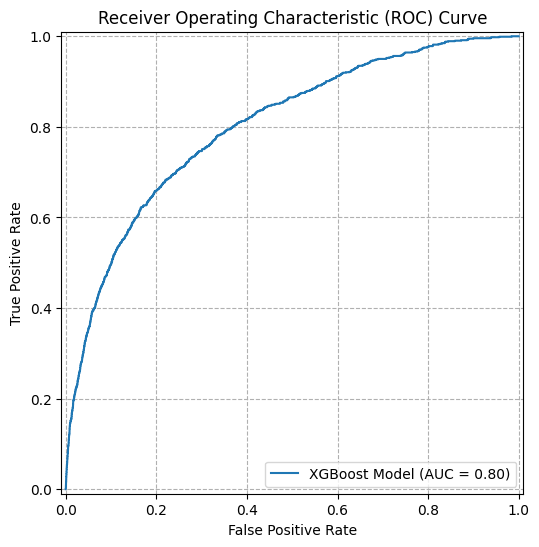

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
fig, ax = plt.subplots(figsize=(8, 6))
roc_display = RocCurveDisplay.from_predictions(y_test, y_pred_proba, ax=ax, name='XGBoost Model')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(linestyle='--')
plt.show()
